# Overview
In this lab, we will clean the data to prepare it for analysis. We will remove any trips with really long or really short durations.

| | |
| --------- | --------------------------- |
| Notebook  | 2b_DataCleansing.ipynb    |
| Builds On | 2_TripData.ipynb |
| Time to complete | 30 minutes


## Setup
Run the following cell to load the required libraries and data (same as previous lab).

<Axes: xlabel='duration', ylabel='Count'>

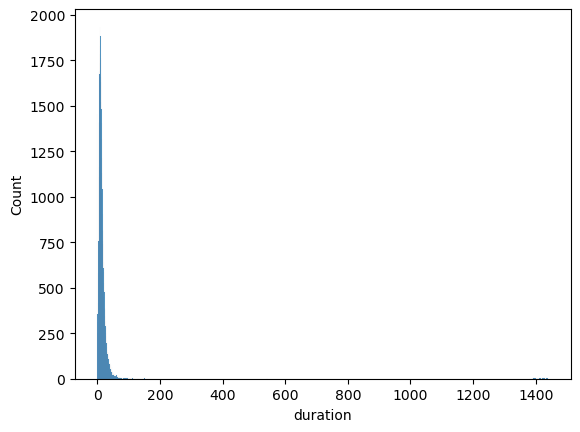

In [5]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('../tripdata.csv')
df['duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 60
df.head()
sns.histplot(df['duration'])

## Step 1: Data Cleaning
You might notice from the plot that the graph has a really long tail on the right. This is because there are some really long trips.  If we look at the output of the `describe` method, we can see that the maximum trip time is 1439 minutes.  That's a long time.

In [6]:
df.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
count,56471.000000,56471,56471,54483.000000,56471.000000,56471.000000,54483.000000,56471.000000,56471.000000,56471.000000,56471.000000,56471.000000,56471.000000,0.0,56471.000000,56471.000000,54483.000000,54475.000000,54483.000000,56471.000000
mean,1.883976,2024-04-15 22:33:04.951019,2024-04-15 22:51:29.480034,1.186297,96.040428,141.340688,1.304958,12.088796,17.522481,0.931872,0.571665,2.518530,0.211510,NaN,0.979559,23.363727,1.296661,1.038440,0.815314,18.408817
min,1.000000,2024-03-31 22:34:23,2024-03-31 22:45:33,1.000000,1.000000,1.000000,0.000000,0.000000,-450.000000,-5.000000,-0.500000,-17.880000,0.000000,NaN,-1.000000,-451.000000,1.000000,1.000000,-2.750000,0.000000
25%,2.000000,2024-04-08 11:57:07,2024-04-08 12:12:35.500000,1.000000,74.000000,74.000000,1.000000,1.100000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,13.800000,1.000000,1.000000,0.000000,7.466667
50%,2.000000,2024-04-16 01:54:42,2024-04-16 02:16:54,1.000000,75.000000,140.000000,1.000000,1.820000,13.500000,0.000000,0.500000,2.020000,0.000000,NaN,1.000000,19.000000,1.000000,1.000000,0.000000,11.650000
75%,2.000000,2024-04-23 13:20:03.500000,2024-04-23 13:38:45,1.000000,97.000000,226.000000,1.000000,3.130000,20.500000,2.500000,0.500000,3.780000,0.000000,NaN,1.000000,27.600000,2.000000,1.000000,2.750000,17.783333
max,2.000000,2024-04-30 23:59:33,2024-05-01 23:35:25,99.000000,265.000000,265.000000,9.000000,192842.370000,578.400000,7.500000,1.500000,343.240000,35.000000,NaN,1.000000,579.900000,4.000000,2.000000,2.750000,1439.866667
std,0.320257,NaN,NaN,1.431596,57.045495,76.511064,0.951083,948.127785,15.166440,1.392809,0.358631,3.399307,1.270576,NaN,0.156320,17.329174,0.488103,0.192257,1.255446,74.060173



Let's get rid of the outliers.  Trips shorter than one minute or longer than an hour are probably errors.  Let's remove them.


In [7]:
df = df[(df.duration > 1) & (df.duration < 60)]
df.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
count,54021.000000,54021,54021,52073.000000,54021.000000,54021.000000,52073.000000,54021.000000,54021.00000,54021.000000,54021.000000,54021.000000,54021.000000,0.0,54021.000000,54021.000000,52073.000000,52070.000000,52073.000000,54021.000000
mean,1.883545,2024-04-15 22:26:51.276133,2024-04-15 22:40:57.046000,1.106850,94.870624,141.333093,1.306934,12.507029,16.95319,0.956970,0.583005,2.531765,0.204342,NaN,0.985256,22.867334,1.281662,1.022239,0.844761,14.096164
min,1.000000,2024-03-31 22:34:23,2024-03-31 22:45:33,1.000000,1.000000,1.000000,0.000000,0.000000,-93.22000,-5.000000,-0.500000,-17.880000,0.000000,NaN,-1.000000,-94.220000,1.000000,1.000000,-2.750000,1.016667
25%,2.000000,2024-04-08 11:56:16,2024-04-08 12:09:51,1.000000,74.000000,74.000000,1.000000,1.180000,10.00000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,13.800000,1.000000,1.000000,0.000000,7.833333
50%,2.000000,2024-04-16 01:36:06,2024-04-16 01:49:33,1.000000,75.000000,140.000000,1.000000,1.860000,13.50000,0.000000,0.500000,2.100000,0.000000,NaN,1.000000,19.000000,1.000000,1.000000,0.000000,11.833333
75%,2.000000,2024-04-23 13:35:17,2024-04-23 13:51:06,1.000000,97.000000,226.000000,1.000000,3.150000,19.80000,2.500000,0.500000,3.830000,0.000000,NaN,1.000000,27.240000,2.000000,1.000000,2.750000,17.733333
max,2.000000,2024-04-30 23:59:33,2024-05-01 00:06:37,99.000000,265.000000,265.000000,9.000000,192842.370000,324.00000,7.500000,1.500000,343.240000,35.000000,NaN,1.000000,370.790000,4.000000,2.000000,2.750000,59.950000
std,0.320772,NaN,NaN,0.968266,55.992943,76.309989,0.952728,969.386687,12.06525,1.400749,0.348525,3.256315,1.242640,NaN,0.119389,14.513518,0.463647,0.147462,1.268146,9.157244


Let's plot the data again to see if the outliers are gone.

<Axes: xlabel='duration', ylabel='Count'>

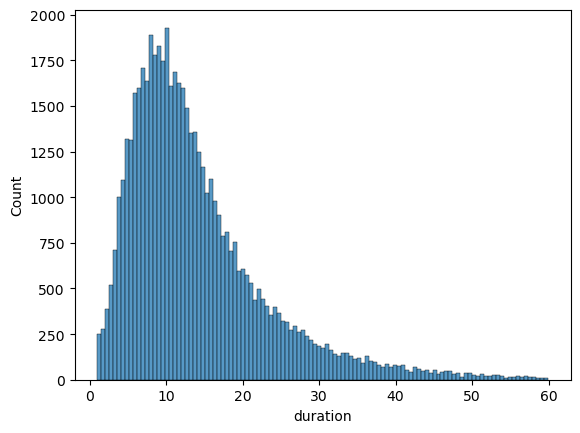

In [8]:

sns.histplot(df['duration'])

That looks better.  The data is still skewed, but it's not as extreme as before.  We could try to normalize the data, but for now, let's leave it as is.